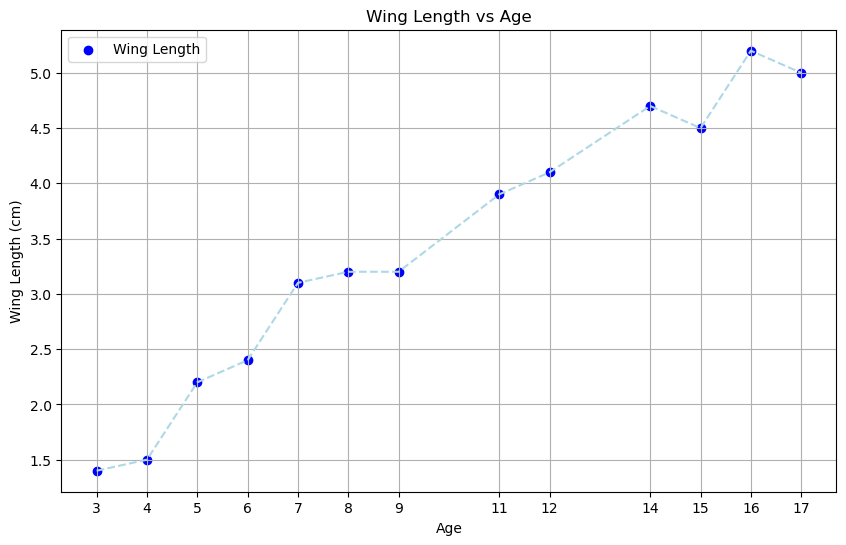

In [1]:
import matplotlib.pyplot as plt

# Data
age = [3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17]
wing_length = [1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(age, wing_length, color='blue', label='Wing Length')

# Adding a line of best fit
plt.plot(age, wing_length, color='lightblue', linestyle='--')

# Labels and title
plt.title('Wing Length vs Age')
plt.xlabel('Age')
plt.ylabel('Wing Length (cm)')
plt.xticks(age)  # Set x-ticks to be the age values
plt.grid()
plt.legend()

# Show the plot
plt.show()


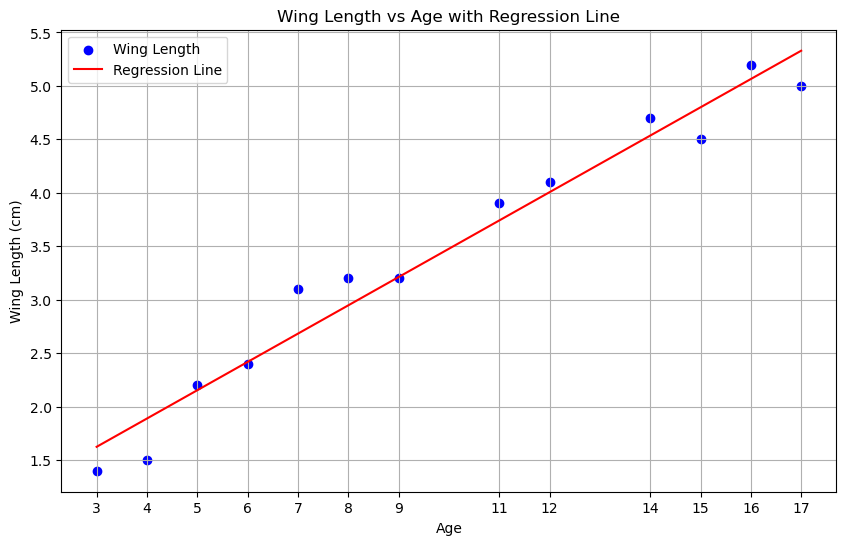

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Data
age = np.array([3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17])
wing_length = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0])

# Perform linear regression
slope, intercept = np.polyfit(age, wing_length, 1)

# Generate x values for the regression line
x_values = np.linspace(min(age), max(age), 100)
y_values = slope * x_values + intercept

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(age, wing_length, color='blue', label='Wing Length')

# Plot the regression line
plt.plot(x_values, y_values, color='red', label='Regression Line')

# Labels and title
plt.title('Wing Length vs Age with Regression Line')
plt.xlabel('Age')
plt.ylabel('Wing Length (cm)')
plt.xticks(age)  # Set x-ticks to be the age values
plt.grid()
plt.legend()

# Show the plot
plt.show()


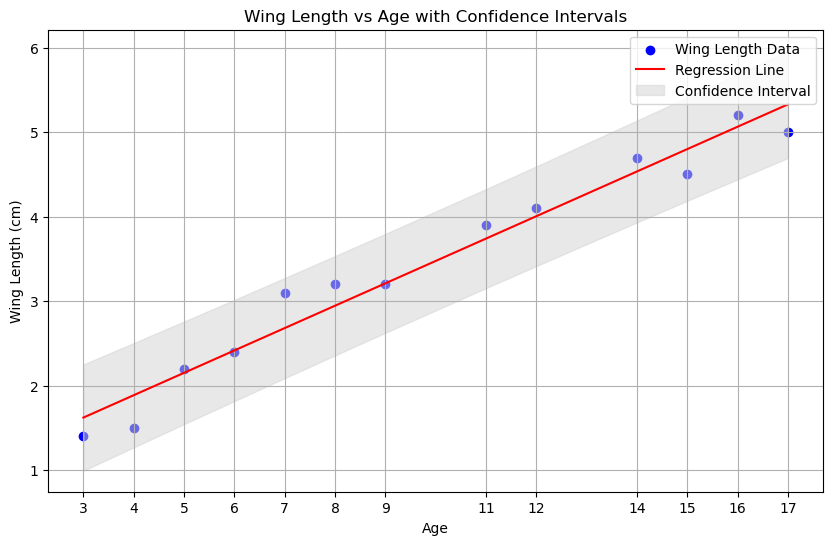

In [9]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Data
age = np.array([3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17])
wing_length = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0])

# Add a constant (intercept) to the model
X = sm.add_constant(age)
model = sm.OLS(wing_length, X).fit()

# Get predictions and confidence intervals
predictions = model.get_prediction(X)
summary_frame = predictions.summary_frame(alpha=0.05)  # 95% CI

# Extract the fitted values and confidence intervals
fitted_values = summary_frame['mean']
lower_ci = summary_frame['obs_ci_lower']
upper_ci = summary_frame['obs_ci_upper']

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(age, wing_length, color='blue', label='Wing Length Data')
plt.plot(age, fitted_values, color='red', label='Regression Line')
plt.fill_between(age, lower_ci, upper_ci, color='lightgrey', alpha=0.5, label='Confidence Interval')

# Labels and title
plt.title('Wing Length vs Age with Confidence Intervals')
plt.xlabel('Age')
plt.ylabel('Wing Length (cm)')
plt.xticks(age)  # Set x-ticks to be the age values
plt.grid()
plt.legend()

# Show the plot
plt.show()


In [11]:
import numpy as np
import statsmodels.api as sm

# Data
age = np.array([3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17])
wing_length = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0])

# Add a constant (intercept) to the model
X = sm.add_constant(age)
model = sm.OLS(wing_length, X).fit()

# Get the coefficient of determination (R-squared)
r_squared = model.rsquared

print(f'Coefficient of Determination (R²): {r_squared:.4f}')


Coefficient of Determination (R²): 0.9634


In [13]:
import numpy as np
from scipy.stats import pearsonr

# Data
age = np.array([3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17])
wing_length = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0])

# Calculate Pearson's r
r, p_value = pearsonr(age, wing_length)

print(f'Pearson\'s correlation coefficient (r): {r:.4f}')
print(f'p-value: {p_value:.4f}')


Pearson's correlation coefficient (r): 0.9815
p-value: 0.0000


In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Original Data
age = np.array([3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17])
wing_length = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0])

# Add noise
np.random.seed(42)  # For reproducibility
noise = np.random.normal(0, 0.5, wing_length.shape)  # Normal noise with mean 0 and std dev 0.5
noisy_wing_length = wing_length + noise

# Fit the regression model to the noisy data
X_noisy = sm.add_constant(age)
model_noisy = sm.OLS(noisy_wing_length, X_noisy).fit()

# Get predictions for the noisy model
predictions_noisy = model_noisy.predict(X_noisy)

# Plotting the original and noisy data with regression lines
plt.figure(figsize=(12, 6))

# Original Data
plt.subplot(1, 2, 1)
plt.scatter(age, wing_length, color='blue', label='Original Data')
plt.plot(age, sm.OLS(wing_length, sm.add_constant(age)).fit().predict(sm.add_constant(age)), color='red', label='Regression Line')
plt.title('Original Data with Regression')
plt.xlabel('Age')
plt.ylabel('Wing Length (cm)')
plt.legend()
plt.grid()

# Noisy Data
plt.subplot(1, 2, 2)
plt.scatter(age, noisy_wing_length, color='orange', label='Noisy Data')
plt.plot(age, predictions_noisy, color='red', label='Regression Line (Noisy)')
plt.title('Noisy Data with Regression')
plt.xlabel('Age')
plt.ylabel('Wing Length (cm)')
plt.legend()
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()
